### Import

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot') 

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

### Load Data

In [59]:
dmf = pd.read_csv('data/yun_data/output/covid_socio_2020.csv')
unemp_covid_df = pd.read_csv('data/yun_data/output/unemployment_covid_2020.csv')
covid_df = pd.read_csv('data/yun_data/output/covid_monthly_2020.csv')
df3 = pd.read_csv('data/yun_data/output/unemp_rate_2020.csv')
df4 = pd.read_csv('data/yun_data/output/cov_unemp_summary.csv')

### Modeling : 

In [60]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'deaths_per_population', 'recovered_per_population',
       'confirmed_per_population', 'active_per_population', 'unemp_year_rate'],
      dtype='object')

### Clustering Kmeans -  n_clusters = 2

In [61]:
# Data for clustering
X = dmf.drop(columns = ['Name', 'Postal Code'])

#fit the data
model = KMeans(n_clusters=2)
model.fit(X)

# Get the labels and centroids for our first clustering model
k2_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 0 2 0 1 2 0 0 0 1 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 1 2 0 2 0
 0 2 0 0 0 2 1 0 0 2 2 0 2 0]
Location of centroids: 
[[1.78771936e+05 4.65532172e+06 1.46512480e+02 1.69382979e+01
  1.83489362e+01 4.93872340e+01 7.91425532e+01 1.26617021e+01
  1.05787234e+01 8.59574468e+01 9.53191489e+00 2.00191489e+01
  6.52184681e+04 1.21191489e+01 8.16808511e+00 2.63468085e+00
  6.64021277e+01 1.02425532e+02 1.43016809e+04 1.35125532e+03
  3.49000000e+02 7.39837660e+04 6.59652553e+04 2.88822638e+05
  4.93212766e+03 1.35527255e+05 1.48363255e+05 6.33945657e+03
  3.40721226e+06 1.62687641e+00 8.06097097e+04 9.97334004e-04
  3.40144394e-02 6.35182387e-02 2.85064653e-02 7.45425532e+00]
 [3.57809500e+05 2.73598505e+07 9.96660367e+01 1.63750000e+01
  1.83750000e+01 4.92000000e+01 7.06000000e+01 1.39250000e+01
  3.12000000e+01 8.74750000e+01 1.38500000e+01 2.06000000e+01
  6.89522500e+04 1.27750000e+01 1.11250000e+01 2.84750000e+00
  5.91250000e+01 3.95750000e+02 6

In [62]:
#create third column
dmf['k2_labels'] = k2_labels

dmf.k2_labels.value_counts()

0    47
1     4
Name: k2_labels, dtype: int64

In [80]:
# Compute the silouette score and visually examine the results.
round(silhouette_score(X, k2_labels),2)

0.78

### Clustering Kmeans -  n_clusters = 3

In [64]:
# Data for clustering
X = dmf.drop(columns = ['Name', 'Postal Code'])

#fit the data
model = KMeans(n_clusters=3)
model.fit(X)

# Get the labels and centroids for our first clustering model
k3_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 0 2 0 1 2 0 0 0 1 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 1 2 0 2 0
 0 2 0 0 0 2 1 0 0 2 2 0 2 0]
Location of centroids: 
[[1.98343517e+05 2.35778352e+06 1.78773416e+02 1.71482759e+01
  1.84344828e+01 4.95206897e+01 8.00655172e+01 1.12931034e+01
  1.01034483e+01 8.53000000e+01 9.51379310e+00 1.93724138e+01
  6.31920690e+04 1.25827586e+01 8.39655172e+00 2.63344828e+00
  6.63724138e+01 7.28965517e+01 8.04344828e+03 7.56793103e+02
  1.90103448e+02 3.88054483e+04 3.37656897e+04 1.53844621e+05
  2.27851724e+03 8.49778966e+04 6.65882069e+04 6.47794551e+03
  1.70489724e+06 1.50232907e+00 8.34671477e+04 9.39972926e-04
  3.81347037e-02 6.47767564e-02 2.57020797e-02 7.37517241e+00
  1.38777878e-17]
 [3.57809500e+05 2.73598505e+07 9.96660367e+01 1.63750000e+01
  1.83750000e+01 4.92000000e+01 7.06000000e+01 1.39250000e+01
  3.12000000e+01 8.74750000e+01 1.38500000e+01 2.06000000e+01
  6.89522500e+04 1.27750000e+01 1.11250000e+01 2.84750000e+00
  5.91250000e+01

In [65]:
#create third column
dmf['k3_labels'] = k3_labels
dmf.k3_labels.value_counts()

0    29
2    18
1     4
Name: k3_labels, dtype: int64

In [81]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k3_labels),2)

0.55

### Clustering Kmeans -  n_clusters = 4

In [67]:
# Data for clustering
X = dmf.drop(columns = ['Name', 'Postal Code'])

#fit the data
model = KMeans(n_clusters=4)
model.fit(X)

# Get the labels and centroids for our first clustering model
k4_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k4_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [2 2 0 2 3 0 2 2 2 1 0 2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 2 2 2 0 2 1 0 2 0 2
 2 0 2 2 2 0 1 2 2 0 0 2 0 2]
Location of centroids: 
[[ 1.47239944e+05  8.35691106e+06  9.45365275e+01  1.66000000e+01
   1.82111111e+01  4.91722222e+01  7.76555556e+01  1.48666667e+01
   1.13444444e+01  8.70166667e+01  9.56111111e+00  2.10611111e+01
   6.84832222e+04  1.13722222e+01  7.80000000e+00  2.63666667e+00
   6.64500000e+01  1.50000000e+02  2.43843889e+04  2.30900000e+03
   6.05000000e+02  1.30659944e+05  1.17842333e+05  5.06287222e+05
   9.20738889e+03  2.16967889e+05  2.80111944e+05  6.11633549e+03
   6.14983089e+06  1.82753601e+00  7.60060595e+04  1.08974907e-03
   2.73762357e-02  6.14906268e-02  3.30246420e-02  7.58166667e+00
   4.16333634e-17  2.00000000e+00]
 [ 3.35757000e+05  2.33090597e+07  1.01822563e+02  1.69000000e+01
   1.82666667e+01  4.90333333e+01  7.29333333e+01  1.62333333e+01
   2.84666667e+01  8.66333333e+01  1.31333333e+01  2.01666667e+01
   6.51230000

In [68]:
#create third column
dmf['k4_labels'] = k4_labels
dmf.k4_labels.value_counts()

2    29
0    18
1     3
3     1
Name: k4_labels, dtype: int64

In [82]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k4_labels),2)

0.55

### Clustering Kmeans -  n_clusters = 6

In [70]:
# Data for clustering
X = dmf.drop(columns = ['Name', 'Postal Code'])

#fit the data
model = KMeans(n_clusters=6)
model.fit(X)

# Get the labels and centroids for our first clustering model
k6_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k6_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 4 1 4 3 1 1 4 4 0 2 4 4 2 1 4 4 1 1 4 1 2 2 1 4 1 4 4 4 4 2 4 5 2 4 2 1
 1 2 4 1 4 1 0 4 4 1 1 4 1 4]
Location of centroids: 
[[ 4.32987000e+05  2.52368090e+07  8.38945870e+01  1.69000000e+01
   1.88000000e+01  4.92500000e+01  7.65000000e+01  1.55500000e+01
   3.30500000e+01  8.67000000e+01  1.35000000e+01  1.96500000e+01
   6.16305000e+04  1.31500000e+01  1.58000000e+01  2.83000000e+00
   6.40500000e+01  4.49000000e+02  7.20560000e+04  7.47500000e+03
   1.70600000e+03  3.26538500e+05  2.77525500e+05  1.54804950e+06
   2.48695000e+04  7.14678000e+05  8.08502000e+05  6.12645624e+03
   1.47232890e+07  1.60991940e+00  6.02560102e+04  9.88510999e-04
   2.46475698e-02  6.13762507e-02  3.57401699e-02  7.59500000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.51790529e+05  5.72369371e+06  6.12736065e+01  1.67411765e+01
   1.83882353e+01  4.92176471e+01  7.84294118e+01  1.48294118e+01
   1.04470588e+01  8.61117647e+01  1.02411765e+01  1.98235294e+

In [71]:
#create third column
dmf['k6_labels'] = k6_labels
dmf.k6_labels.value_counts()

4    22
1    17
2     8
0     2
5     1
3     1
Name: k6_labels, dtype: int64

In [83]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k3_labels),2)

0.55

### Clustering Kmeans -  n_clusters = 8

In [73]:
# Data for clustering
X = dmf.drop(columns = ['Name', 'Postal Code'])

#fit the data
model = KMeans(n_clusters=8)
model.fit(X)

# Get the labels and centroids for our first clustering model
k8_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k8_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [6 0 3 6 4 3 6 0 0 1 7 0 0 2 3 6 6 6 6 0 3 2 7 3 6 3 0 0 6 0 7 0 5 7 0 7 6
 6 7 0 6 0 3 1 6 0 3 3 0 3 0]
Location of centroids: 
[[ 2.32154750e+05  1.19493188e+06  2.88515087e+02  1.76000000e+01
   1.79000000e+01  4.97875000e+01  8.18625000e+01  7.62500000e+00
   9.95625000e+00  8.62000000e+01  8.25625000e+00  2.03625000e+01
   6.64576875e+04  1.14937500e+01  7.68125000e+00  2.60375000e+00
   6.63625000e+01  4.25625000e+01  3.74581250e+03  3.71312500e+02
   9.96250000e+01  2.21650000e+04  1.95260625e+04  7.32785000e+04
   1.02506250e+03  4.40595625e+04  2.81938750e+04  6.20228695e+03
   1.09349612e+06  1.46693997e+00  9.91139456e+04  8.73702786e-04
   3.95087544e-02  6.20228695e-02  2.16404123e-02  7.10000000e+00
   2.77555756e-17 -2.22044605e-16  2.00000000e+00  4.00000000e+00]
 [ 4.32987000e+05  2.52368090e+07  8.38945870e+01  1.69000000e+01
   1.88000000e+01  4.92500000e+01  7.65000000e+01  1.55500000e+01
   3.30500000e+01  8.67000000e+01  1.35000000e+

In [74]:
#create third column
dmf['k8_labels'] = k8_labels
dmf.k8_labels.value_counts()

0    16
6    13
3    10
7     6
2     2
1     2
5     1
4     1
Name: k8_labels, dtype: int64

In [84]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k8_labels),2)

0.44

### Clustering Kmeans -  n_clusters = 10

In [76]:
# Data for clustering
X = dmf.drop(columns = ['Name', 'Postal Code'])

#fit the data
model = KMeans(n_clusters=10)
model.fit(X)

# Get the labels and centroids for our first clustering model
k10_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k10_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 5 7 0 2 7 0 5 5 6 3 5 5 8 7 5 5 0 0 5 7 9 3 7 5 7 5 5 0 5 3 5 4 3 5 3 0
 0 3 5 0 5 7 1 0 5 7 7 5 7 5]
Location of centroids: 
[[ 1.55320200e+05  4.02122790e+06  5.09142774e+01  1.65400000e+01
   1.89600000e+01  4.91900000e+01  7.73700000e+01  1.54000000e+01
   1.12200000e+01  8.47700000e+01  1.13500000e+01  1.80900000e+01
   5.99677000e+04  1.38800000e+01  9.34000000e+00  2.69300000e+00
   6.58700000e+01  1.04100000e+02  1.34071000e+04  1.28180000e+03
   3.14200000e+02  6.06479000e+04  5.67789000e+04  2.56630300e+05
   3.82620000e+03  1.34887200e+05  1.17916900e+05  6.47053446e+03
   2.84301620e+06  1.52835346e+00  7.18093700e+04  9.49912605e-04
   3.40347592e-02  6.47053446e-02  2.97206727e-02  8.06900000e+00
   0.00000000e+00  0.00000000e+00  2.00000000e+00  1.90000000e+00
   6.00000000e+00]
 [ 6.95662000e+05  2.89958810e+07  4.16809902e+01  1.29000000e+01
   2.12000000e+01  4.96000000e+01  7.59000000e+01  1.35000000e+01
   3.97000000e+01  8.64000000

In [77]:
#create third column
dmf['k10_labels'] = k10_labels
dmf.k10_labels.value_counts()

5    19
7    10
0    10
3     6
9     1
8     1
6     1
4     1
2     1
1     1
Name: k10_labels, dtype: int64

In [85]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k10_labels),2)

0.42

### Result

In [90]:
dmf[['Name','k2_labels']].sort_values('k2_labels')

,Name,k2_labels
0,Alabama,0
26,Montana,0
27,Nebraska,0
28,Nevada,0
29,New Hampshire,0
30,New Jersey,0
31,New Mexico,0
33,North Carolina,0
34,North Dakota,0
35,Ohio,0


In [100]:
dmf[['Name','k3_labels']].sort_values('k3_labels')

,Name,k3_labels
0,Alabama,0
24,Mississippi,0
26,Montana,0
27,Nebraska,0
28,Nevada,0
29,New Hampshire,0
31,New Mexico,0
34,North Dakota,0
36,Oklahoma,0
37,Oregon,0


In [92]:
dmf[['Name','k4_labels']].sort_values('k4_labels')

,Name,k4_labels
25,Missouri,0
33,North Carolina,0
49,Wisconsin,0
35,Ohio,0
23,Minnesota,0
22,Michigan,0
21,Massachusetts,0
20,Maryland,0
38,Pennsylvania,0
14,Indiana,0


In [105]:
dmf[dmf['k3_labels']== 0]['Name'].values

array(['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Delaware',
       'District of Columbia', 'Hawaii', 'Idaho', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mississippi', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'North Dakota', 'Oklahoma', 'Oregon', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Utah', 'Vermont',
       'West Virginia', 'Wyoming'], dtype=object)

In [106]:
dmf[dmf['k3_labels']== 1]['Name'].values

array(['California', 'Florida', 'New York', 'Texas'], dtype=object)

In [107]:
dmf[dmf['k3_labels']== 2]['Name'].values

array(['Arizona', 'Colorado', 'Georgia', 'Illinois', 'Indiana',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri',
       'New Jersey', 'North Carolina', 'Ohio', 'Pennsylvania',
       'Tennessee', 'Virginia', 'Washington', 'Wisconsin'], dtype=object)

In [110]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'deaths_per_population', 'recovered_per_population',
       'confirmed_per_population', 'active_per_population', 'unemp_year_rate',
       'k2_labels', 'k3_labels', 'k4_labels', 'k6_labels', 'k8_labels',
       'k10_labels'],
      dtype='object')

### Social Features

<ipython-input-113-3ff9d7d529c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


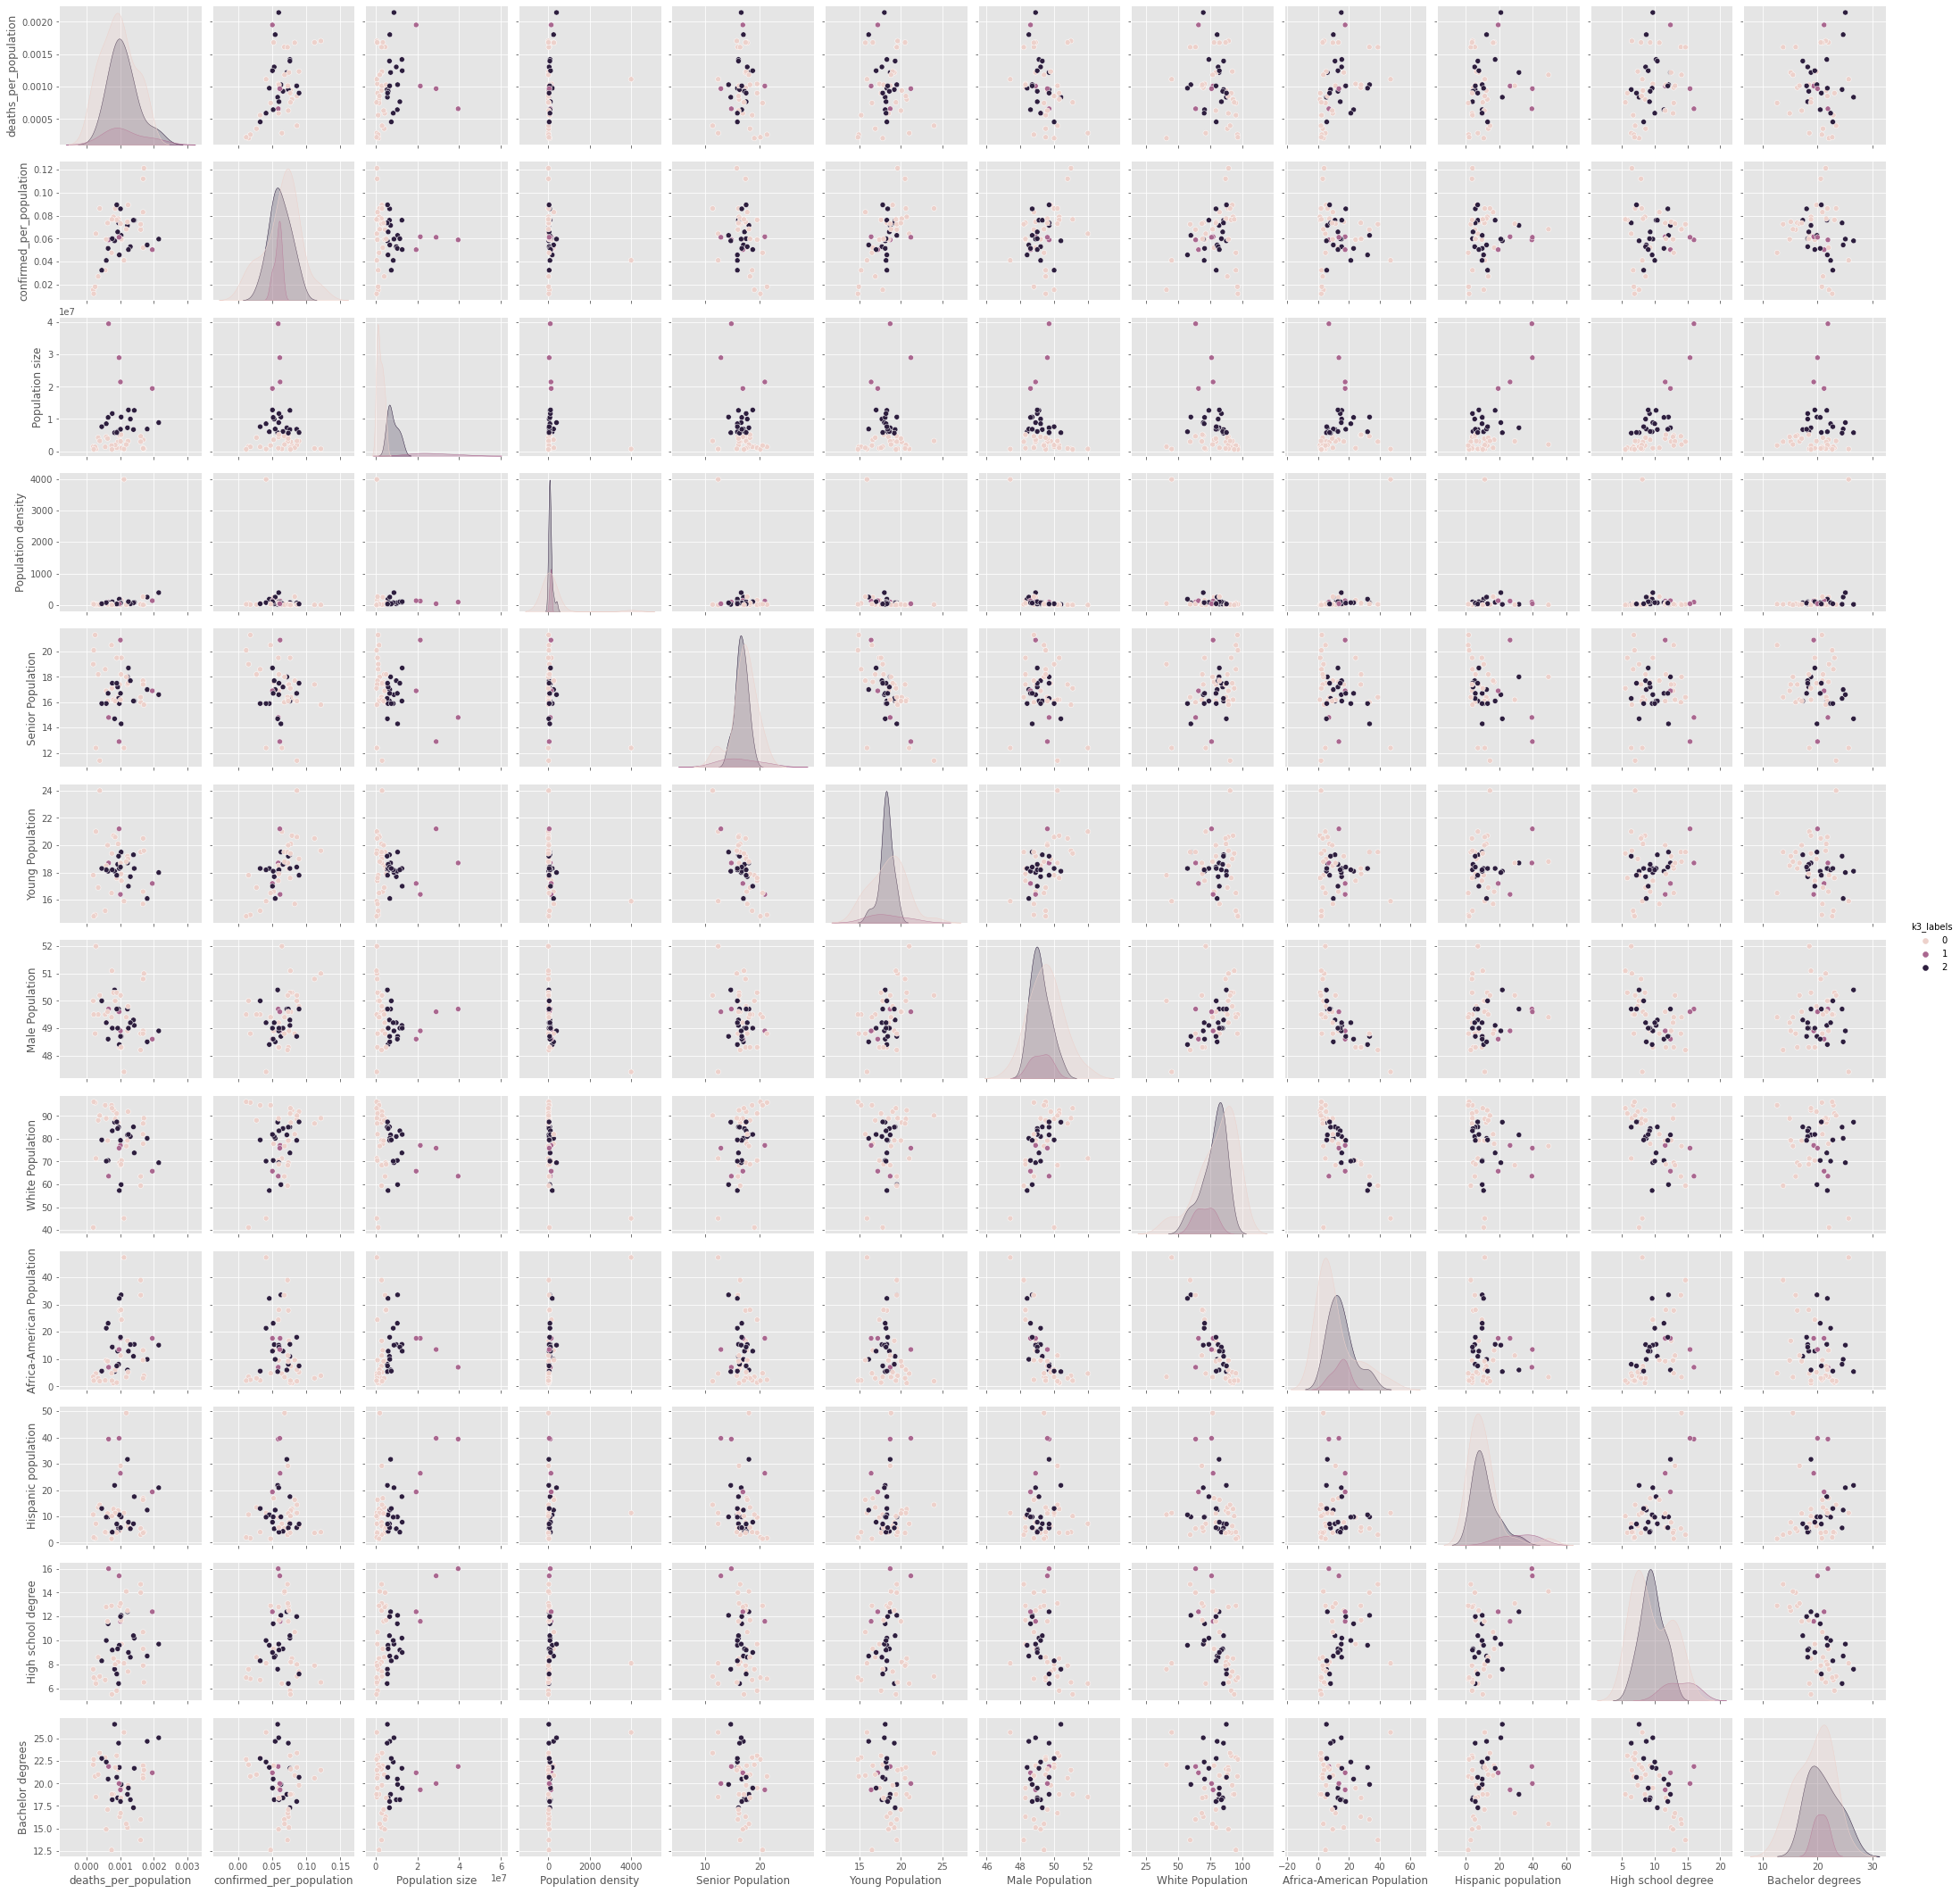

In [113]:
# visually examine the cluster that have been created
k3 = dmf[['deaths_per_population', 'confirmed_per_population','Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population','High school degree',
       'Bachelor degrees']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Economic Features

<ipython-input-115-51004873d5bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


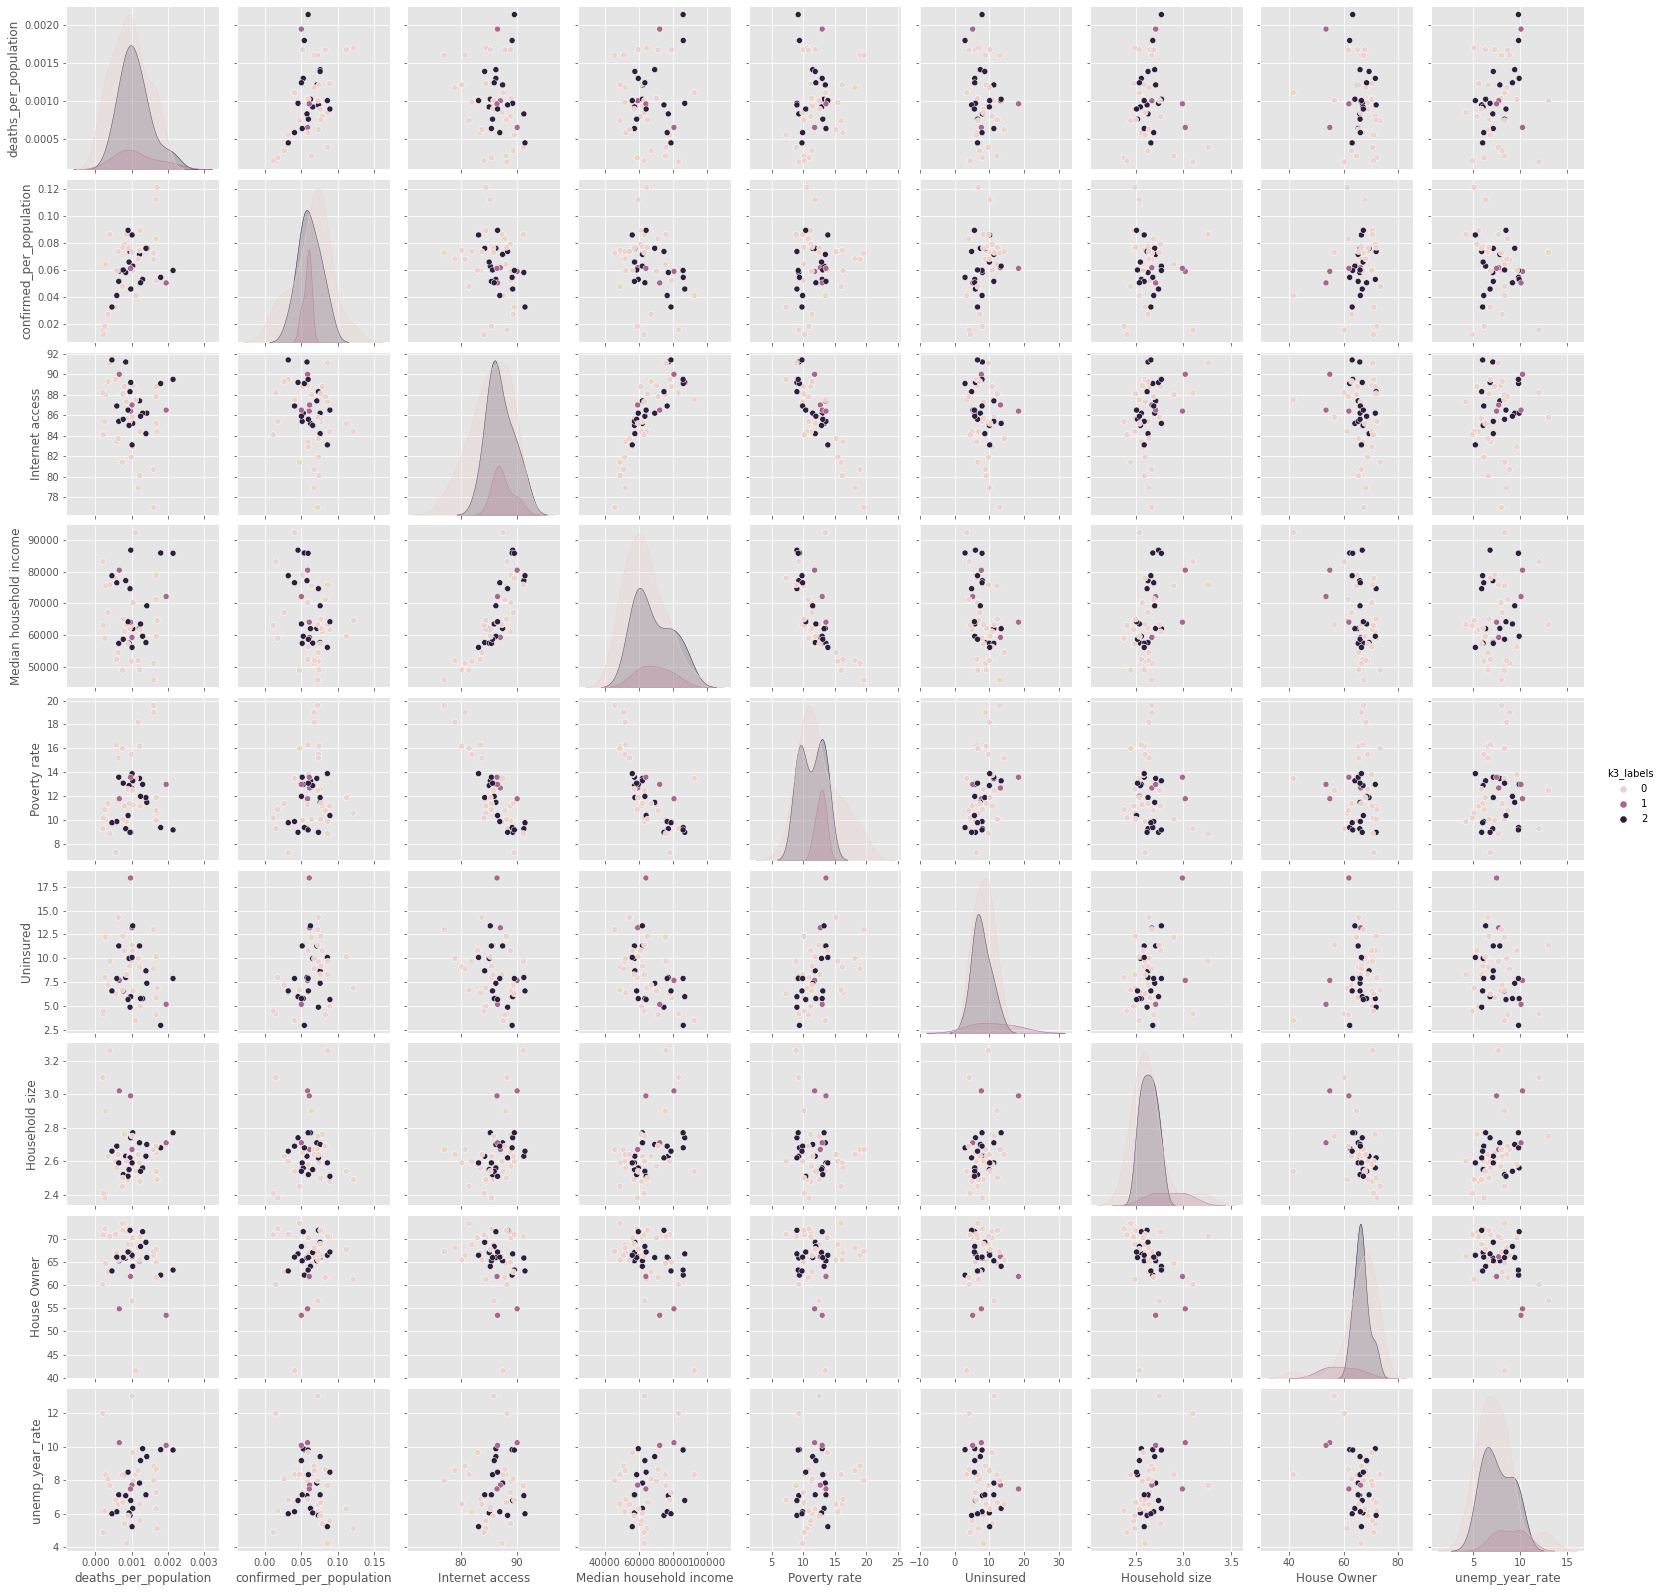

In [115]:
# visually examine the cluster that have been created
k3 = dmf[['deaths_per_population','confirmed_per_population','Internet access', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','unemp_year_rate']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Medical Features

<ipython-input-116-5ea52e4b3d8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


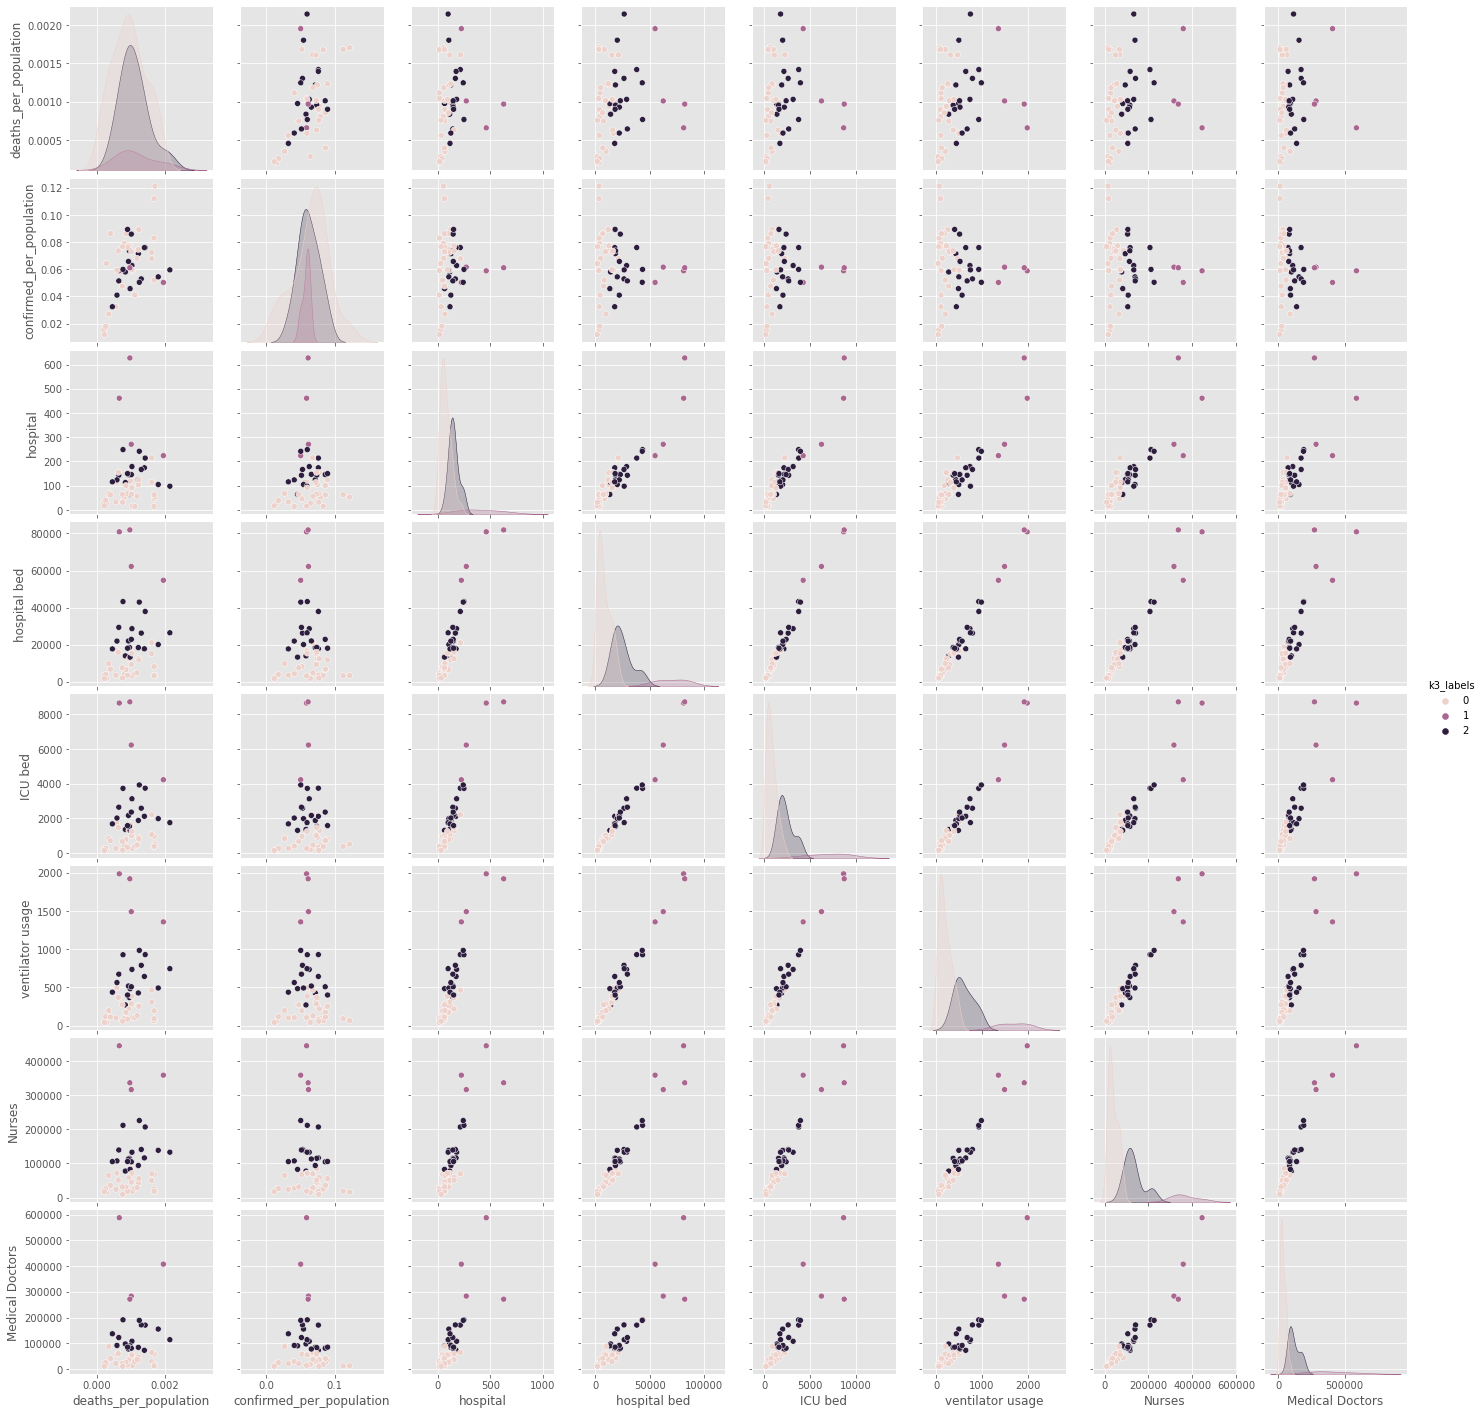

In [116]:
# visually examine the cluster that have been created
k3 = dmf[['deaths_per_population','confirmed_per_population','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');